In [30]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *
from plotting import *

In [31]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 8
filling_factor_inv = 3
top_shift=3
Nphi = filling_factor_inv*N-top_shift

print('N_phi=',Nphi, 'flux quanta for N_e=',N,'electrons')

#initialization (system configurations and parameters)
system = system(N, Nphi,0,L2=False)
#print(system.Q)
#print(system.L2.A)
len(system.occ_orbitals)

N_phi= 21 flux quanta for N_e= 8 electrons
========Initializing possible states in spherical geometry========
completed in 1.1661498546600342 seconds
N = 8 electrons
Nphi = 21 flux quanta



8512

In [36]:
#trial pseudopotential according to Greiter et al
trial_pp=np.array([1,1,0,0])
trial_pp=np.append(trial_pp, np.zeros((Nphi+1)-len(trial_pp)))
trial_pp = haldane_pseudopotential(system.Q, 
                                   LLn = 0,
                                   width=0,
                                   custom=trial_pp,
                                   interaction=True)

#Coulomb pseudopotentials
pp = haldane_pseudopotential(system.Q,
                             LLn = 0,
                             width=0,
                             interaction=True)

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %


KeyboardInterrupt: 

Text(0.5, 1.0, 'Haldane Pseudopotentials')

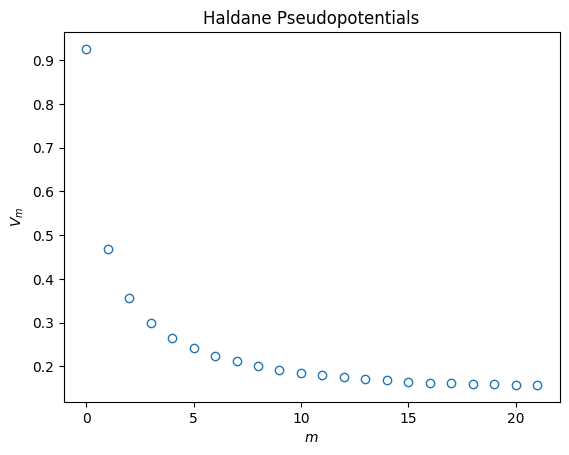

In [ ]:
ax=plt.plot(pp.m, pp.V, ls="none", marker="o", mfc="none", label="$n=0$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
plt.xlabel('$m$')
plt.ylabel('$V_m$')
plt.title('Haldane Pseudopotentials')


In [ ]:
#create hamiltonian and diagonalize coulomb interaction
hamiltonian = spherical_system(system, pp.pp_matrix)
hamil=hamiltonian.h.A
energies, eigenstates=LA.eigh(hamil)
L2=system.L2.A

L,ene=L_spectrum(L2,hamil)
#print('Energy spectrum:', L)

"""
hamil=np.loadtxt("N8_Hamil.csv",delimiter=",")
L2=np.loadtxt("N8_L2.csv",delimiter=",")
"""

AttributeError: 'haldane_pseudopotential' object has no attribute 'pp_matrix'

Text(0, 0.5, '$E$')

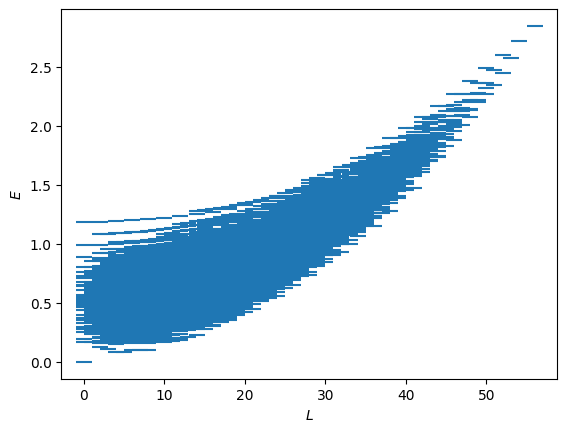

In [27]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(L, ene, ls="none", marker="_", ms="12", mew="1.5")
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

Text(0, 0.5, '$E$')

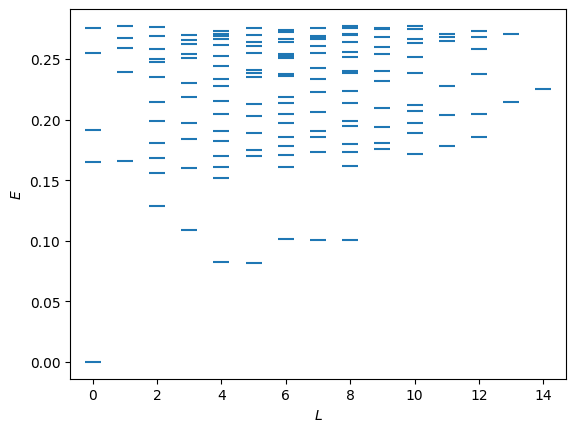

In [28]:
ind=np.argsort(ene) #ensure lowest energy eigenstates are selected

sorted_L=L[ind]
sorted_ene=ene[ind]
if len(ene)>=100: 
    sorted_L=sorted_L[:150]
    sorted_ene=sorted_ene[:150]
    
#plotting energetics
fig, ax = plt.subplots()
ax=plt.plot(sorted_L, sorted_ene, ls="none", marker="_", ms="12", mew="1.5")
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

In [29]:
trial_hamiltonian = spherical_system(system, trial_pp.pp_matrix)
trial_hamil=trial_hamiltonian.h.A
trial_energies, trial_eigenstates=LA.eigh(trial_hamil)

energy, eigenstates=LA.eigh(hamil)

overlap_Vectors(trial_eigenstates[:,0],eigenstates[:,0])

AttributeError: 'haldane_pseudopotential' object has no attribute 'pp_matrix'

## Entanglement Spectrum

In [9]:
energies, eigenstates=LA.eigh(hamil,subset_by_index=[0,0])

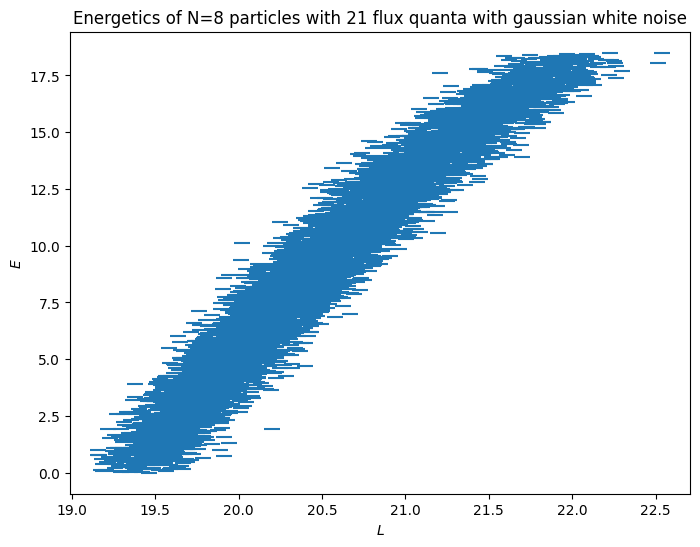

In [10]:
#create noisy hamiltonian with gaussian white noise of specified width
width=0.05

noise_hamil=hamil+np.random.normal(0,width,hamil.shape)
noise_energies, noise_eigenstates=LA.eigh(noise_hamil)

plot_L2_spectrum(hamil=noise_hamil,
                 L2=L2,
                 title=f'Energetics of N={N} particles with {Nphi} flux quanta with gaussian white noise',
                 figsize=(8,6),sorted=False, 
                 lim=50)

In [11]:
noise_overlap=overlap_Vectors(np.transpose(eigenstates)[0],np.transpose(noise_eigenstates)[0])

overlap of wavefunciton <Ψtrial|Ψexact>= 0.00605326991023638


In [37]:
Norb=Nphi+1
mzvals=np.arange(-Nphi/2,Nphi/2+1)
subsystemA = np.arange(Norb/2,Norb,dtype=int)
NA=int(4)
LzAvec = np.arange(12,36) #noninclusive endpoint 

Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35] ...
Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35] ...


/Users/logange/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


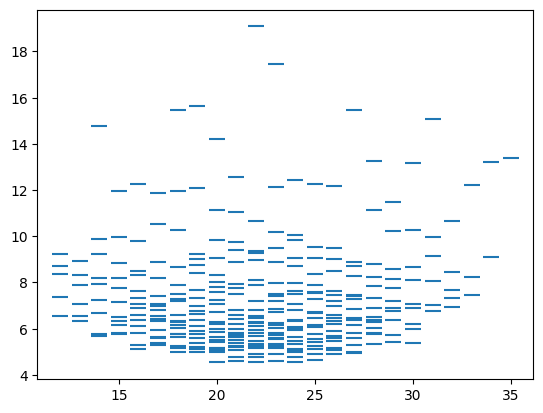

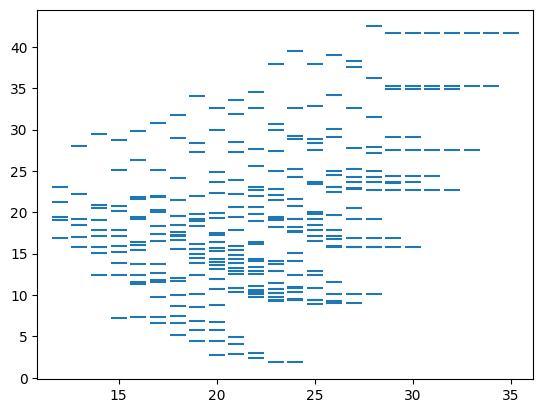

In [38]:
#disordered Hamiltonian
disordered_ent_spec=system.entanglement_spectrum(noise_eigenstates[:,0],subsystemA,NA,LzAvec)

fig, ax = plt.subplots()
ax=plt.plot(disordered_ent_spec[:,0], disordered_ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

#pure Hamiltonian
ent_spec=system.entanglement_spectrum(eigenstates[:,0],subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

In [39]:
def get_entanglement_entropy(eta):
   
   eta = np.real(eta)
   return sum(eta*np.exp(-eta))

In [40]:
print("Coulomb system EE:", get_entanglement_entropy(ent_spec[:,1]))
print("Disordered Coulomb system EE:", get_entanglement_entropy(disordered_ent_spec[:,1]))

print("\nDelta S:", np.abs(get_entanglement_entropy(ent_spec[:,1])-get_entanglement_entropy(disordered_ent_spec[:,1])))

Coulomb system EE: 1.6576343499029562
Disordered Coulomb system EE: 3.680485675789289

Delta S: 2.0228513258863328


In [43]:
noise_strength = np.arange(0.,0.005,0.0005)
h_dimension = hamil.shape

def average(lst):
    return sum(lst) / len(lst)

delta_S = np.array([])
S_E = np.array([])

for width in noise_strength:
    S_E_val=[]

    print(f'Getting S_E for width {width}/{max(noise_strength)}')
    
    for i in range(0,1):
        noise_energies,noise_eigenstates = LA.eigh(hamil+np.random.normal(0,width,h_dimension),subset_by_index=[0,0])
        disordered_ent_spec=system.entanglement_spectrum(noise_eigenstates,subsystemA,NA,LzAvec)
        
        S_E_val.append(get_entanglement_entropy(disordered_ent_spec[:,1]))

    S_E = np.append(S_E, average(S_E_val))

Getting S_E for width 0.0/0.0045000000000000005
Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35] ...
Getting S_E for width 0.0005/0.0045000000000000005
Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35] ...
Getting S_E for width 0.001/0.0045000000000000005
Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35] ...
Getting S_E for width 0.0015/0.0045000000000000005
Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35] ...
Getting S_E for width 0.002/0.0045000000000000005
Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35] ...
Getting S_E for width 0.0025/0.0045000000000000005
Calculating entanglement spectrum for NA = 4, LzA

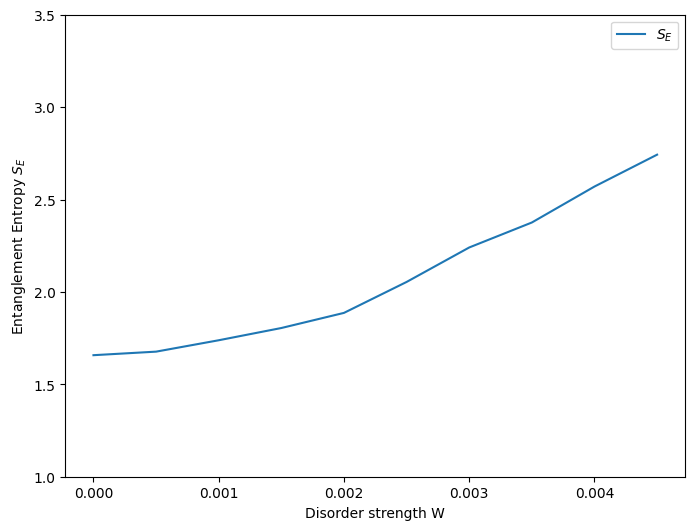

In [44]:

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(noise_strength, S_E, label="$S_E$")
#plt.plot(noise_strength,S_E_model,label="$S_{E,model}$")

plt.ylim(1,3.5)
plt.xlabel('Disorder strength W')
plt.ylabel('Entanglement Entropy $S_E$')

plt.legend()

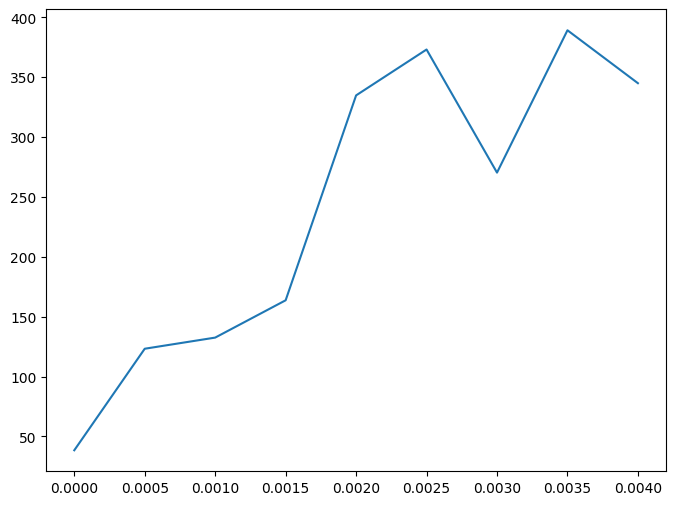

In [45]:
dx=noise_strength[1]-noise_strength[0]
dydx = np.diff(S_E)/dx

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(noise_strength[0:len(noise_strength)-1], dydx, label="$S_E$")

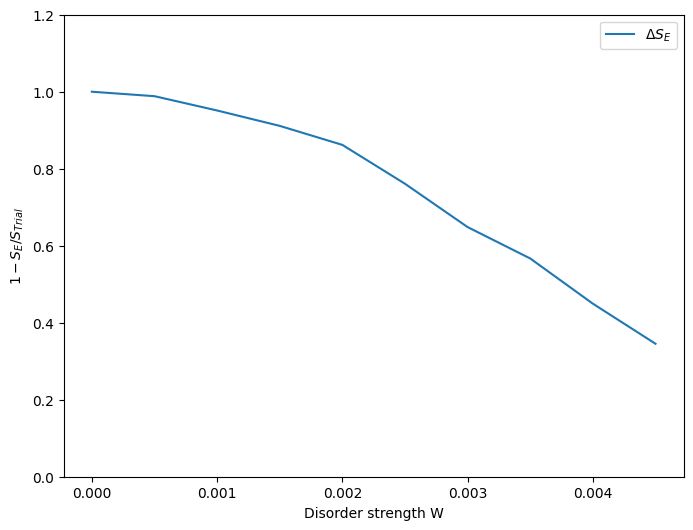

In [47]:
fig,ax=plt.subplots(figsize=(8,6))

plt.plot(noise_strength,1-np.abs(S_E-S_E[0])/S_E[0] ,label="$\Delta S_E$")
plt.ylim(0,1.2)
plt.xlabel('Disorder strength W')
plt.ylabel('$1-S_E/S_{Trial}$')

plt.legend()